<a href="https://colab.research.google.com/github/Pverma-1234/DataScience-ToolBox-Python/blob/main/PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**✅ 1. Load & Clean Data (Handling Missing Values)**

In [ ]:



# 🔧 Import libraries
import pandas as pd
import numpy as np

# 📥 Load the dataset
df = pd.read_csv("TrafficAnalysis.csv")

# 🧼 Convert timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 📋 Basic info
print("\n🔍 Dataset Overview:")
print(df.info())

print("\n📊 First 5 Rows:")
print(df.head())

# ❓ Check for missing values
print("\n🧯 Missing Values Summary:")
print(df.isnull().sum())

# 🧽 Handling missing values

# 1. Fill numeric columns with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 2. Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

# ✅ Confirm all missing values handled
print("\n✅ Missing Values After Cleaning:")
print(df.isnull().sum())



🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Timestamp         10000 non-null  datetime64[ns]
 1   Location ID       10000 non-null  object        
 2   Latitude          10000 non-null  float64       
 3   Longitude         10000 non-null  float64       
 4   Vehicle Count     10000 non-null  int64         
 5   Avg Speed (km/h)  10000 non-null  float64       
 6   Weather           10000 non-null  object        
 7   Road Condition    10000 non-null  object        
 8   Incident          1975 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 703.3+ KB
None

📊 First 5 Rows:
            Timestamp Location ID   Latitude   Longitude  Vehicle Count  \
0 2025-04-11 06:00:00     LOC_041  36.996321 -117.345000             34   
1 2025-04-11 06:01:00  

**# 📅 TIME FEATURE ENGINEERING**

In [ ]:

# Extract time-based features
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['Day'] = df['Timestamp'].dt.day_name()

# Create binary target variable for congestion (custom rule-based)
df['Congestion'] = (df['Vehicle Count'] > 80).astype(int)

# Optional: Simplify incident type into a binary column
df['Traffic Status'] = df['Incident'].apply(lambda x: 1 if x in ['Congestion', 'Accident', 'Breakdown'] else 0)
df

,Timestamp,Location ID,Latitude,Longitude,Vehicle Count,Avg Speed (km/h),Weather,Road Condition,Incident,Hour,DayOfWeek,IsWeekend,Day,Congestion,Traffic Status
0,2025-04-11 06:00:00,LOC_041,36.996321,-117.345000,34,47.7,Clear,Dry,Accident,6,4,0,Friday,0,1
1,2025-04-11 06:01:00,LOC_016,34.464669,-117.936767,32,47.7,Rainy,Dry,Accident,6,4,0,Friday,0,1
2,2025-04-11 06:02:00,LOC_044,34.164676,-117.210631,36,45.4,Cloudy,Dry,Accident,6,4,0,Friday,0,1
3,2025-04-11 06:03:00,LOC_003,36.433938,-120.326705,29,45.3,Clear,Dry,Accident,6,4,0,Friday,0,1
4,2025-04-11 06:04:00,LOC_033,38.894823,-123.023543,26,64.7,Cloudy,Dry,Accident,6,4,0,Friday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2025-04-12 04:35:00,LOC_036,37.401992,-117.598314,37,45.9,Cloudy,Wet,Accident,4,5,1,Saturday,0,1
9996,2025-04-12 04:36:00,LOC_020,36.623527,-118.540182,29,34.9,Cloudy,Dry,Accident,4,5,1,Saturday,0,1
9997,2025-04-12 04:37:00,LOC_027,35.510830,-123.023208,24,45.5,Clear,Wet,Accident,4,5,1,Saturday,0,1
9998,2025-04-12 04:38:00,LOC_031,34.606432,-121.609084,30,47.8,Clear,Wet,Breakdown,4,5,1,Saturday,0,1


**✅ Refined Titles for Histogram-Based Analysis**

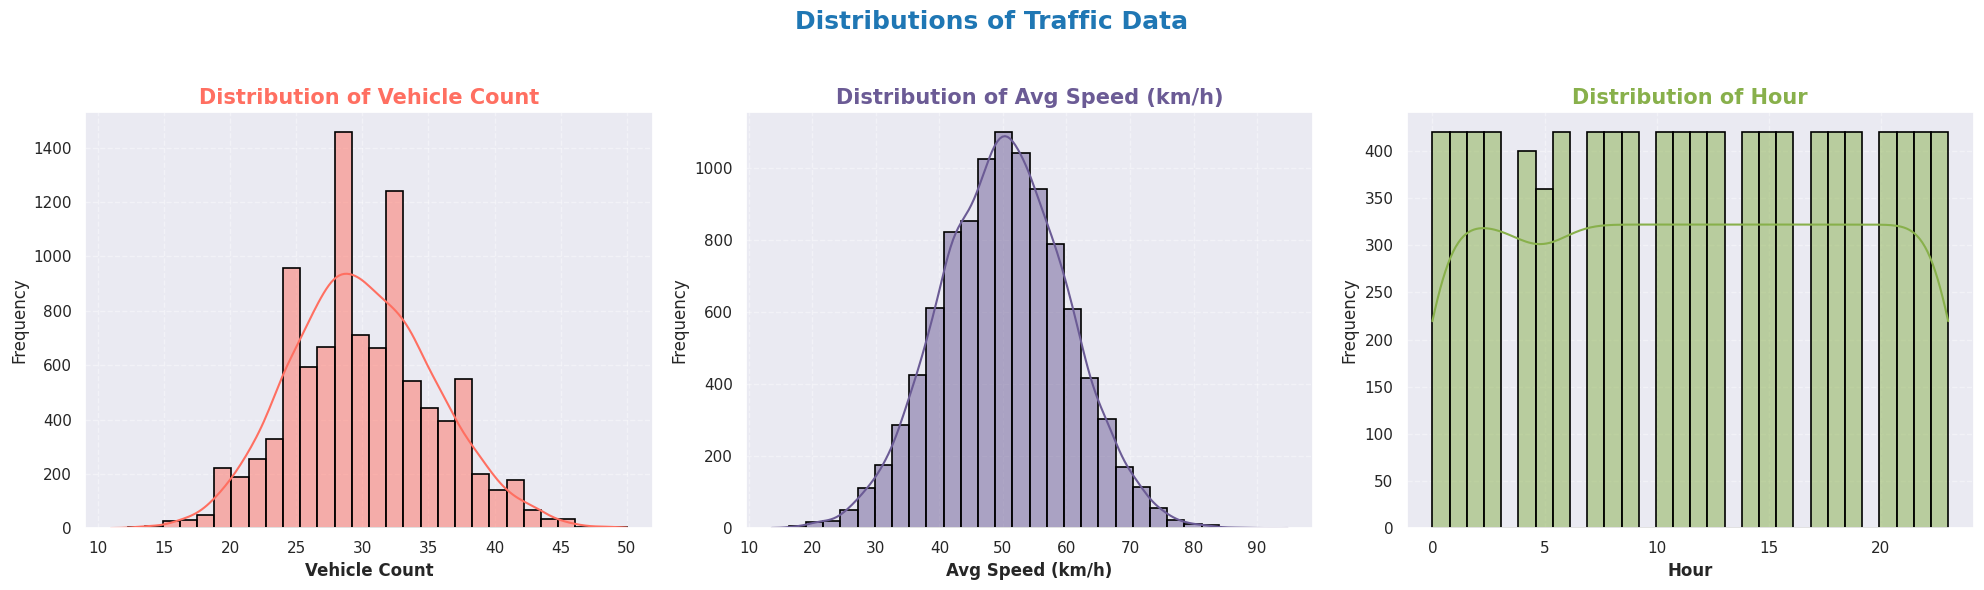

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("TrafficAnalysis.csv")

# Convert Timestamp to datetime if needed
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour

# Set colorful theme
sns.set_style("darkgrid")
sns.set_palette("bright")  # colorful palette

# Use vibrant individual colors
colors = ['#FF6F61', '#6B5B95', '#88B04B']  # red, purple, green

# Numeric columns to plot
numeric_cols = ['Vehicle Count', 'Avg Speed (km/h)', 'Hour']

# Create the plots
plt.figure(figsize=(20, 6))
for i, (col, color) in enumerate(zip(numeric_cols, colors), 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color=color, edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of {col}', fontsize=15, fontweight='bold', color=color)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)

# Add a vibrant main title
plt.suptitle("Distributions of Traffic Data", fontsize=18, fontweight='bold', color='#1f77b4')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



**📊 Driving Through Time: 🕒 Hourly Vehicle Count Breakdown**

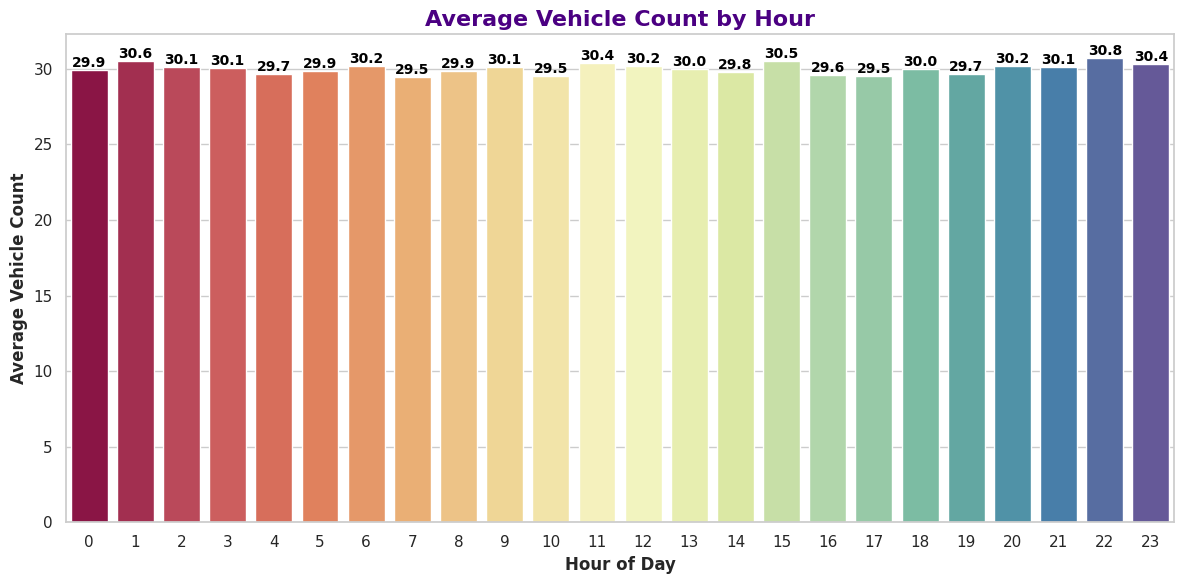

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("TrafficAnalysis.csv")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour

# Group data: average vehicle count by hour
hourly_avg = df.groupby('Hour')['Vehicle Count'].mean().reset_index()

# Add a column to use as 'hue' for coloring
hourly_avg['Hue'] = hourly_avg['Hour']

# Set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create bar chart using hue to avoid FutureWarning
barplot = sns.barplot(
    data=hourly_avg,
    x='Hour',
    y='Vehicle Count',
    hue='Hue',                    # explicitly set hue
    palette='Spectral',           # use Spectral palette
    legend=False                  # hide legend (since hue is not categorical)
)

# Customize titles and labels
plt.title("Average Vehicle Count by Hour", fontsize=16, fontweight='bold', color='#4B0082')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Average Vehicle Count", fontsize=12, fontweight='bold')

# Add data labels on top of bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}',
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()




**🔵 Scatter of the Streets: 🚗 Hourly Vehicle Counts in Focus**

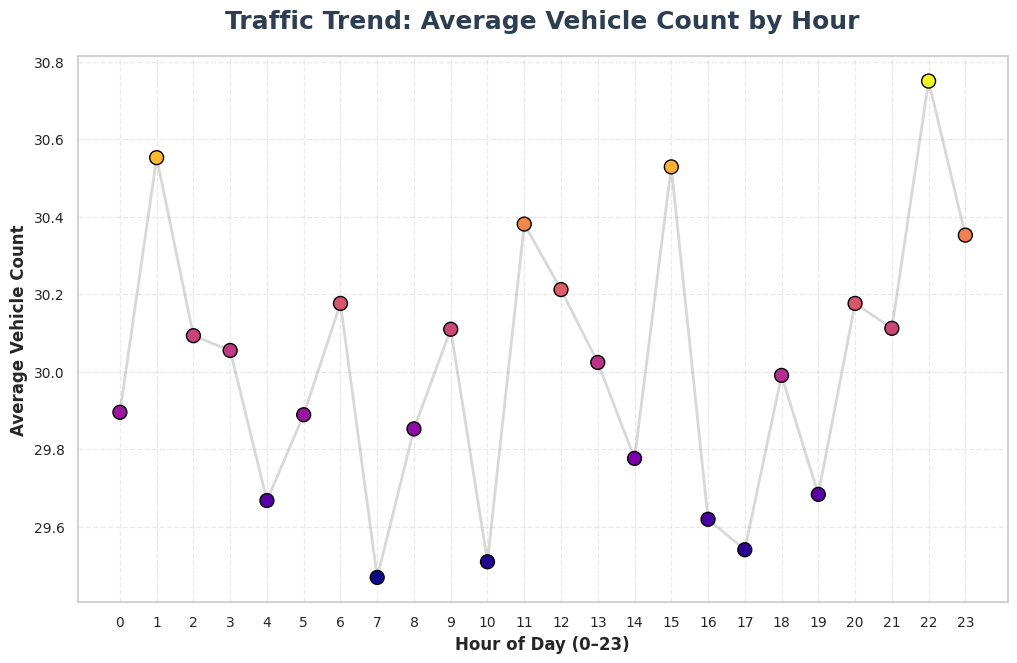

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
# df = pd.read_csv("TrafficAnalysis.csv")

# Convert Timestamp and extract hour
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour

# Group by Hour
hourly_avg = df.groupby('Hour')['Vehicle Count'].mean().reset_index()

# Set seaborn theme
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 7))

# Normalize for color mapping
norm = plt.Normalize(hourly_avg['Vehicle Count'].min(), hourly_avg['Vehicle Count'].max())
colors = plt.cm.plasma(norm(hourly_avg['Vehicle Count'].values))

# Plot base line for smoothness
plt.plot(hourly_avg['Hour'], hourly_avg['Vehicle Count'],
         color='gray', alpha=0.3, linewidth=2, zorder=1)

# Overlay colorful scatter
plt.scatter(hourly_avg['Hour'], hourly_avg['Vehicle Count'],
            c=colors, s=100, edgecolor='black', zorder=2)

# Titles and labels
plt.title("Traffic Trend: Average Vehicle Count by Hour", fontsize=18, fontweight='bold', color='#2c3e50', pad=20)
plt.xlabel("Hour of Day (0–23)", fontsize=12, fontweight='bold')
plt.ylabel("Average Vehicle Count", fontsize=12, fontweight='bold')
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)

# Layout spacing
plt.subplots_adjust(top=0.88, bottom=0.1)

# Show final chart
plt.show()


**📊 Boxed Breakdown: 🚗 Traffic Volume, ⏩ Speed, and ⏰ Hour Patterns**

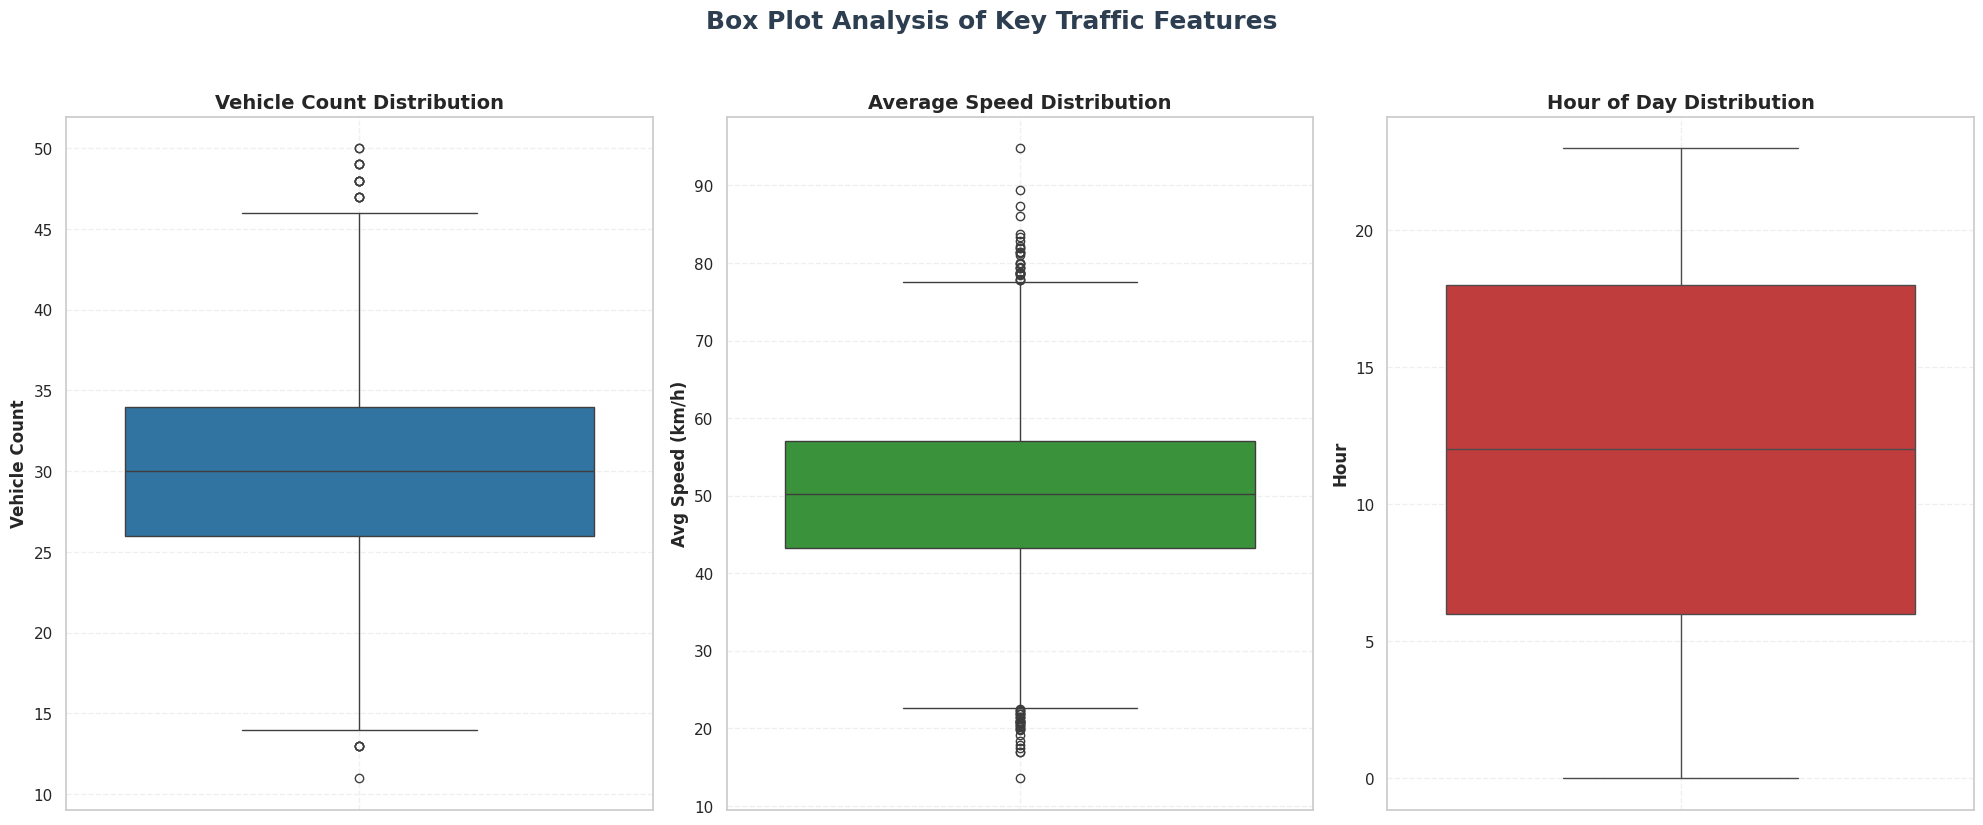

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("TrafficAnalysis.csv")

# Convert Timestamp and extract hour
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour

# Set theme
sns.set_theme(style="whitegrid")

# Set up figure and axes
fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # Wider and taller

# First boxplot: Vehicle Count
sns.boxplot(
    data=df,
    y='Vehicle Count',
    ax=axes[0],
    color='#1f77b4'  # Blue
)
axes[0].set_title("Vehicle Count Distribution", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Vehicle Count", fontsize=12, fontweight='bold')
axes[0].set_xlabel("")
axes[0].grid(True, linestyle='--', alpha=0.3)

# Second boxplot: Avg Speed (km/h)
sns.boxplot(
    data=df,
    y='Avg Speed (km/h)',
    ax=axes[1],
    color='#2ca02c'  # Green
)
axes[1].set_title("Average Speed Distribution", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Avg Speed (km/h)", fontsize=12, fontweight='bold')
axes[1].set_xlabel("")
axes[1].grid(True, linestyle='--', alpha=0.3)

# Third boxplot: Hour (just to show density of data by hour)
sns.boxplot(
    data=df,
    y='Hour',
    ax=axes[2],
    color='#d62728'  # Red
)
axes[2].set_title("Hour of Day Distribution", fontsize=14, fontweight='bold')
axes[2].set_ylabel("Hour", fontsize=12, fontweight='bold')
axes[2].set_xlabel("")
axes[2].grid(True, linestyle='--', alpha=0.3)

# Layout
plt.suptitle("Box Plot Analysis of Key Traffic Features", fontsize=18, fontweight='bold', color='#2c3e50', y=1.03)
plt.tight_layout()
plt.show()




**🚘 Traffic Pulse: 🔍 Speed vs. Count Across the Day**

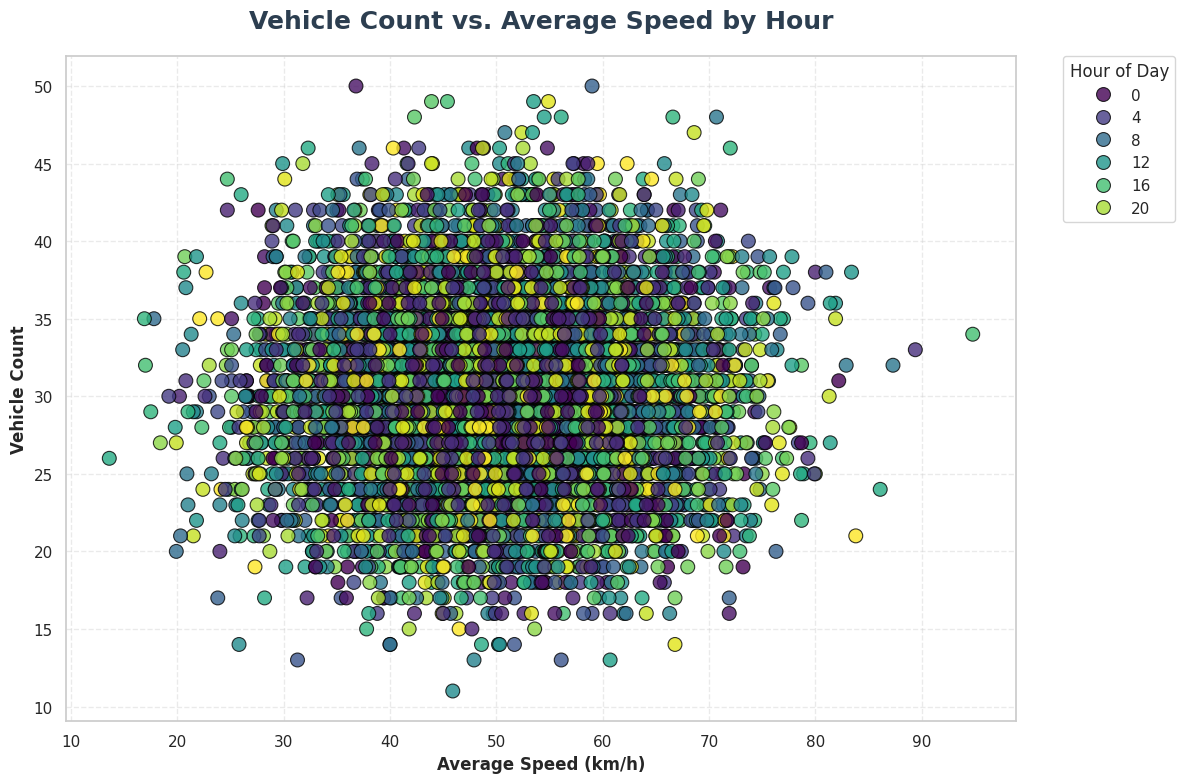

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("TrafficAnalysis.csv")

# Convert Timestamp and extract hour
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour

# Set theme
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,
    x='Avg Speed (km/h)',
    y='Vehicle Count',
    hue='Hour',
    palette='viridis',  # color gradient
    edgecolor='black',
    alpha=0.8,
    s=100
)

# Customize plot
plt.title("Vehicle Count vs. Average Speed by Hour", fontsize=18, fontweight='bold', color='#2c3e50', pad=20)
plt.xlabel("Average Speed (km/h)", fontsize=12, fontweight='bold')
plt.ylabel("Vehicle Count", fontsize=12, fontweight='bold')
plt.legend(title='Hour of Day', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.4)

# Layout
plt.tight_layout()
plt.show()


**🌇 Commute Watch: 🚧 Weekly Traffic Heatmap Visualization**

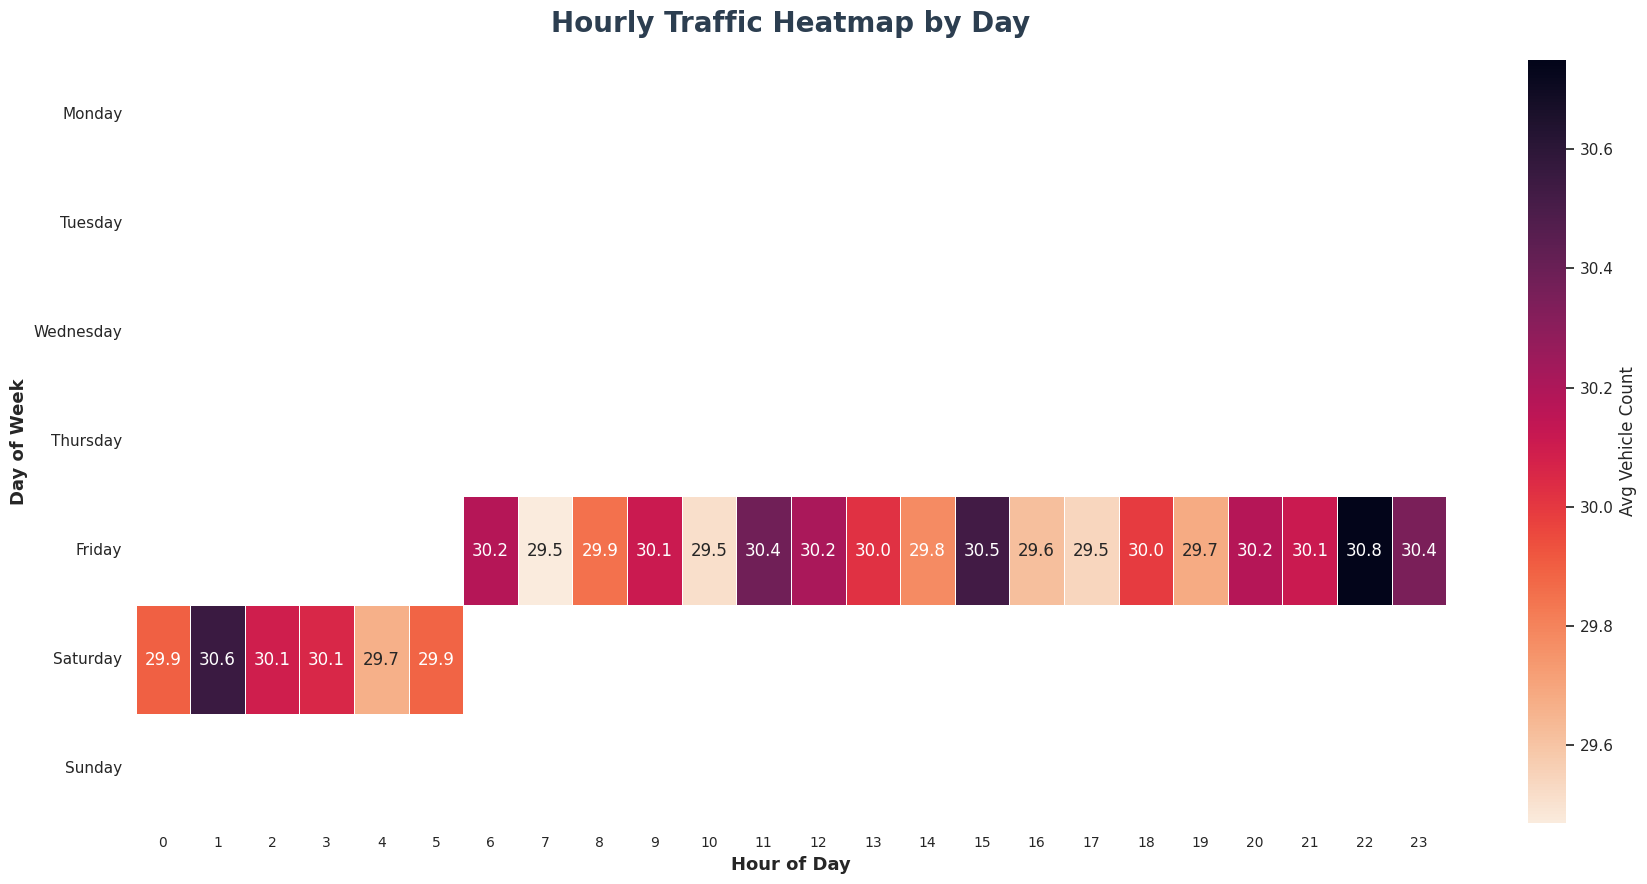

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("TrafficAnalysis.csv")

# Convert timestamp and extract hour and day
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day_name()

# Create pivot table
pivot_table = df.pivot_table(values='Vehicle Count', index='Day', columns='Hour', aggfunc='mean')

# Order the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

# Set the style
sns.set_theme(style="white")

# Plot heatmap
plt.figure(figsize=(18, 9))
sns.heatmap(
    pivot_table,
    cmap='rocket_r',             # Dark elegant red theme
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Avg Vehicle Count'},
    square=False
)

# Title and labels
plt.title("Hourly Traffic Heatmap by Day", fontsize=20, fontweight='bold', color='#2c3e50', pad=20)
plt.xlabel("Hour of Day", fontsize=13, fontweight='bold')
plt.ylabel("Day of Week", fontsize=13, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=11, rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


**🔍 Traffic Trouble Spots: ⚠️ Outlier Boxplot Exploration**

Total Outliers Detected: 20


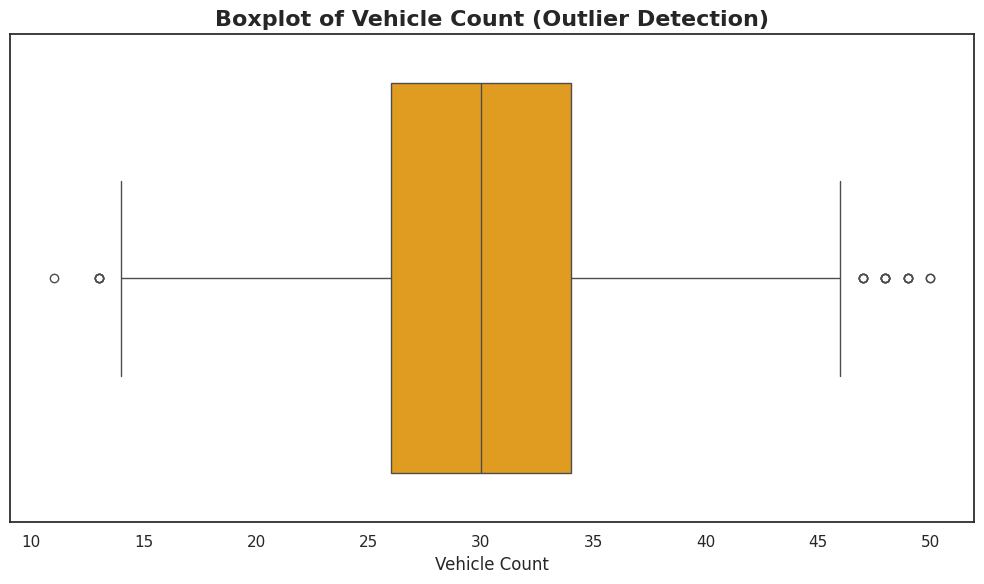

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("TrafficAnalysis.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# IQR Method for 'Vehicle Count'
Q1 = df['Vehicle Count'].quantile(0.25)
Q3 = df['Vehicle Count'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Vehicle Count'] < lower_bound) | (df['Vehicle Count'] > upper_bound)]
non_outliers = df[(df['Vehicle Count'] >= lower_bound) & (df['Vehicle Count'] <= upper_bound)]

print(f"Total Outliers Detected: {len(outliers)}")

# 📦 Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Vehicle Count'], color='orange')
plt.title("Boxplot of Vehicle Count (Outlier Detection)", fontsize=16, fontweight='bold')
plt.xlabel("Vehicle Count")
plt.tight_layout()
plt.show()

# Optional: Show outlier values
# print(outliers[['Timestamp', 'Vehicle Count']])


In [ ]:
# Outlier detection on 'Vehicle Count'
Q1 = df['Vehicle Count'].quantile(0.25)
Q3 = df['Vehicle Count'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['Outlier'] = (df['Vehicle Count'] < lower) | (df['Vehicle Count'] > upper)
print(f"\n🚨 Total Outliers Detected: {df['Outlier'].sum()}")


🚨 Total Outliers Detected: 20


**✅ 3D Traffic Map: 🔺 Outliers vs Normal Flow in Time & Day**

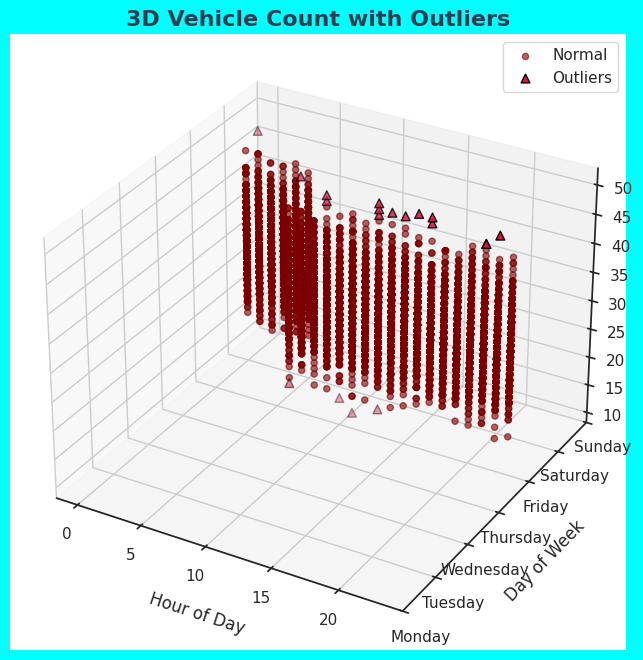

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
df = pd.read_csv("TrafficAnalysis.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day_name()

# Map day names to numeric
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
           'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['DayNum'] = df['Day'].map(day_map)

# IQR outlier detection
Q1 = df['Vehicle Count'].quantile(0.25)
Q3 = df['Vehicle Count'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Outliers and normal data
df['Outlier'] = (df['Vehicle Count'] < lower) | (df['Vehicle Count'] > upper)

# Plot 3D scatter plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Base data
normal = df[~df['Outlier']]
outliers = df[df['Outlier']]

# Plot normal points
ax.scatter(normal['Hour'], normal['DayNum'], normal['Vehicle Count'],
           c='#7c0000', label='Normal', alpha=0.6)

# Plot outliers
ax.scatter(outliers['Hour'], outliers['DayNum'], outliers['Vehicle Count'],
           c='crimson', label='Outliers', s=40, edgecolor='black', marker='^')

# Axis labeling
ax.set_xlabel("Hour of Day", labelpad=10, fontsize=12)
ax.set_ylabel("Day of Week", labelpad=10, fontsize=12)
ax.set_zlabel("Vehicle Count", labelpad=10, fontsize=12)
ax.set_facecolor('white')                      # Plot area
ax.figure.set_facecolor('#00FFFF')               # Outer figure
ax.grid(True, linestyle='--', alpha=0.4)

# Day ticks
ax.set_yticks(list(day_map.values()))
ax.set_yticklabels(list(day_map.keys()))

# Title and legend
ax.set_title("3D Vehicle Count with Outliers", fontsize=16, fontweight='bold', color='#2c3e50')
ax.legend()

plt.show()


**✅ Confusion Unboxed: 🔍 True vs Predicted Labels**

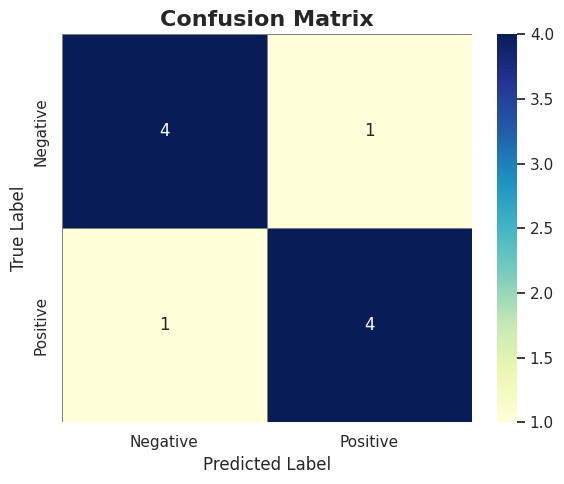

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample actual vs predicted
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Negative', 'Positive']  # Adjust for your class labels

# Plot as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='gray')

# Title and labels
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Layout adjustments
plt.tight_layout()

# Display the plot
plt.show()
